In [74]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy

Part 1: Data Wrangling
===

In [75]:
# load data from csv
data = pd.read_csv('../data/Spotify-2000.csv')

# convert Length (Duration) column to int64 and relabel with units
data['Length (Duration)'] = data['Length (Duration)'].str.replace(",", "")
data['Length (Duration)'] = data['Length (Duration)'].astype('int64')
data = data.rename(columns={'Length (Duration)': 'Duration (Seconds)'})

# display summary information
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
Index                     1994 non-null int64
Title                     1994 non-null object
Artist                    1994 non-null object
Top Genre                 1994 non-null object
Year                      1994 non-null int64
Beats Per Minute (BPM)    1994 non-null int64
Energy                    1994 non-null int64
Danceability              1994 non-null int64
Loudness (dB)             1994 non-null int64
Liveness                  1994 non-null int64
Valence                   1994 non-null int64
Duration (Seconds)        1994 non-null int64
Acousticness              1994 non-null int64
Speechiness               1994 non-null int64
Popularity                1994 non-null int64
dtypes: int64(12), object(3)
memory usage: 233.7+ KB


,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Duration (Seconds),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


Part 2: Exploratory Data Analysis
===

In [76]:
# create dictionary of word frequency in genre
categories = {}
for genre in data['Top Genre']:
    words = genre.split(' ')
    for word in words:
        if word in categories:
            categories[word] += 1
        else:
            categories[word] = 1

# sort dictionary by frequency to get most common overall genre categories
list({k: v for k, v in sorted(categories.items(), key=lambda item: item[1], reverse=True)}.items())[:8]

[('basshall', 1),
 ('gold', 11),
 ('dance', 151),
 ('contemporary', 3),
 ('edm', 3),
 ('psych', 2),
 ('alternative', 187),
 ('cabaret', 51)]

In [77]:
# label data with the selected genre categories
for i, row in data.iterrows():
    if "pop" in row['Top Genre']: 
        data.at[i,'Genre Classification'] = 2
    elif "rock" in row['Top Genre']:
        data.at[i,'Genre Classification'] = 1
    else: 
        data.at[i,'Genre Classification'] = 0

# TODO: Deal with pop rock and metal 

# display
data.head(8)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Duration (Seconds),Acousticness,Speechiness,Popularity,Genre Classification
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71,0.0
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39,1.0
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69,0.0
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76,0.0
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59,1.0
5,6,The Road Ahead (Miles Of The Unknown),City To City,alternative pop rock,2004,99,46,54,-9,14,14,247,0,2,45,2.0
6,7,She Will Be Loved,Maroon 5,pop,2002,102,71,71,-6,13,54,257,6,3,74,2.0
7,8,Knights of Cydonia,Muse,modern rock,2006,137,96,37,-5,12,21,366,0,14,69,1.0


In [78]:
features = data.columns[5:15]
fig, ax = plt.subplots(3,10,figsize=(60,20))
# plt.subplots_adjust(hspace=1.2)
for i, feature in enumerate(features):

    for genre in range(0,3):
        lm = linear_model.LinearRegression()

        frame = data[data['Genre Classification'] == genre]
        x = pd.DataFrame(frame['Year'])
        y = pd.DataFrame(frame['Acousticness'])

        lm.fit(x,y)

        ax[genre, i].scatter(x,y,s=5)

        genre_name =''
        if genre == 2.0:
            genre_name = "pop"
        elif genre == 1.0:
            genre_name = "rock"
        else:
            genre_name = "other"

        ax[genre, i].set_xlabel("year")
        ax[genre, i].set_ylabel(feature)
        ax[genre, i].set_title(f'{feature} in {genre_name} music')

        ax[genre, i].plot(x, lm.predict(x), color='red')

SyntaxError: invalid syntax (<ipython-input-78-656f1ff9e008>, line 27)

# Part 3: Hypothesis Testing

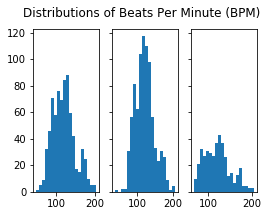

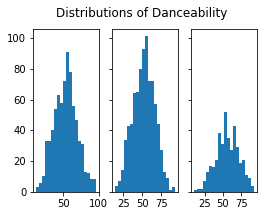

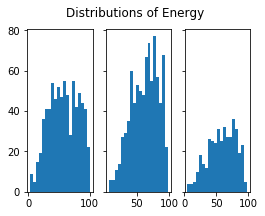

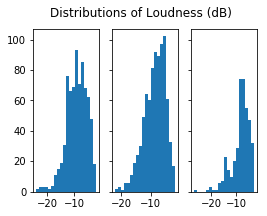

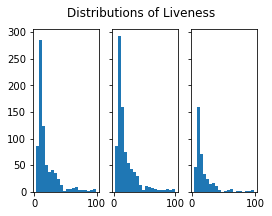

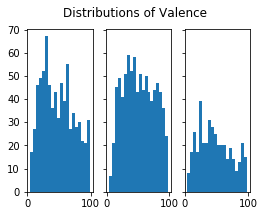

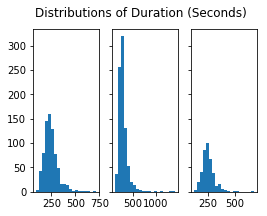

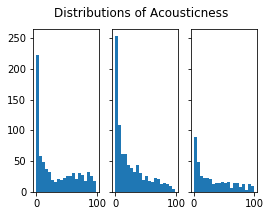

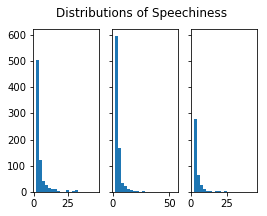

In [79]:
feature_list = ['Beats Per Minute (BPM)', 'Danceability', 'Energy', 'Loudness (dB)', 'Liveness',
                'Valence','Duration (Seconds)','Acousticness','Speechiness']

for feature in feature_list:
    n_bins = 20

    x = data[data['Genre Classification'] == 0][feature]
    y = data[data['Genre Classification'] == 1][feature]
    z = data[data['Genre Classification'] == 2][feature]

    fig, axs = plt.subplots(1, 3,figsize= (4,3),sharey=True)

    fig.suptitle("Distributions of " + feature)
    axs[0].hist(x, bins=n_bins);
    axs[1].hist(y, bins=n_bins);
    axs[2].hist(z, bins=n_bins);


In [80]:
for feature in feature_list:
    x = data[data['Genre Classification'] == 0.0][feature]
    y = data[data['Genre Classification'] == 1.0][feature]
    z = data[data['Genre Classification'] == 2.0][feature]
    t, p = scipy.stats.kruskal(x,y,z)
    print(feature + ": t: " + str(t) + " p-value: " + str(p))
    print("")

Beats Per Minute (BPM): t: 0.6500958753648365 p-value: 0.722492718185433

Danceability: t: 14.5050835566235 p-value: 0.0007083715751304357

Energy: t: 18.730632882803313 p-value: 8.564356722360677e-05

Loudness (dB): t: 23.2550222098979 p-value: 8.917355669329694e-06

Liveness: t: 3.2649845767306176 p-value: 0.1954418691320833

Valence: t: 13.066901454063949 p-value: 0.0014539798954466608

Duration (Seconds): t: 35.95940939794615 p-value: 1.554223470440937e-08

Acousticness: t: 25.713019663579285 p-value: 2.609087977015571e-06

Speechiness: t: 1.134334778164369 p-value: 0.5671296231741061



In [81]:
feature_list = ['Danceability', 'Energy', 'Loudness (dB)',
                'Valence','Duration (Seconds)','Acousticness']
X = []
Y = []
for i, row in data.iterrows():
    x = []
    for feature in feature_list:
        x.append(row[feature])
    X.append(x)
    Y.append(row['Genre Classification'])

In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn import svm

lda_clf = LinearDiscriminantAnalysis()
lda_scores = cross_val_score(lda_clf, X, Y, cv=10, scoring='accuracy')

svm_clf = svm.SVC(kernel='linear', C=0.1, gamma = 1)
svm_scores = cross_val_score(svm_clf, X, Y, cv=10, scoring='accuracy')

In [90]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    stratify=Y, 
                                                    test_size=0.30)
lda_clf.fit(X_train, Y_train);
Y_pred = lda_clf.predict(X_test)
print(metrics.classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.42      0.51      0.46       225
         1.0       0.51      0.64      0.57       254
         2.0       0.18      0.02      0.03       120

   micro avg       0.47      0.47      0.47       599
   macro avg       0.37      0.39      0.35       599
weighted avg       0.41      0.47      0.42       599



In [91]:
feature_list = ['Danceability', 'Energy', 'Loudness (dB)',
                'Valence','Duration (Seconds)','Acousticness']
X = []
Y = []
for i, row in data.iterrows():
    x = []
    for feature in feature_list:
        x.append(row[feature])
    X.append(x)

    if row['Genre Classification'] == 2.0 or row['Genre Classification'] == 0.0:
        Y.append(0)
    else:
        Y.append(1)

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    stratify=Y, 
                                                    test_size=0.30)
lda_clf.fit(X_train, Y_train);
Y_pred = lda_clf.predict(X_test)
print(metrics.classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.65      0.82      0.73       345
           1       0.62      0.41      0.49       254

   micro avg       0.64      0.64      0.64       599
   macro avg       0.64      0.61      0.61       599
weighted avg       0.64      0.64      0.63       599

